# EDA

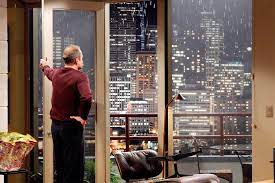

In [246]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [247]:
house_sales = pd.read_csv('data/house_sales.csv')
house_details = pd.read_csv('data/house_details.csv')


In [248]:
# import missingno
import missingno as msno

In [249]:
house_sales.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [250]:

house_details.columns

#house_details['yr_renovated'].fillna(house_details['yr_built'], inplace=True)
house_details.info()
house_details['yr_renovated'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  float64
 11  sqft_basement  20969 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   17609 non-null  float64
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  float64
 18  sqft_l

count   17609.000
mean      838.806
std      4005.127
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     20150.000
Name: yr_renovated, dtype: float64

### General Summary for all set



In [251]:
#step 1 join tables
house_details.rename(columns={'id': 'house_id'}, inplace=True)
house_details.columns
house_details_unique = house_details.drop_duplicates(subset=['house_id'])
house_sales_unique = house_sales.drop_duplicates(subset=['house_id'])


df_house_info = pd.merge(house_details_unique,house_sales_unique,how='inner',on='house_id')
#df_house_info.info()
df_house_info['date']=pd.to_datetime(df_house_info['date'])
df_house_info['year']=df_house_info['date'].dt.year
#df_house_info['zipcode'].unique() 


# zipcode to cities
zipcode_to_area = {
    '98002': 'Auburn',
    '98155': 'Shoreline',
    '98188': 'Tukwila',
    '98059': 'Renton',
    '98118': 'Seattle',
    '98003': 'Federal Way',
    '98023': 'Federal Way',
    '98117': 'Seattle',
    '98034': 'Kirkland',
    '98022': 'Enumclaw',
    '98116': 'Seattle',
    '98001': 'Auburn',
    '98010': 'Black Diamond',
    '98198': 'Des Moines',
    '98042': 'Kent',
    '98038': 'Maple Valley',
    '98027': 'Issaquah',
    '98045': 'North Bend',
    '98144': 'Seattle',
    '98029': 'Issaquah',
    '98075': 'Sammamish',
    '98199': 'Seattle',
    '98107': 'Seattle',
    '98105': 'Seattle',
    '98052': 'Redmond',
    '98053': 'Redmond',
    '98014': 'Carnation',
    '98077': 'Woodinville',
    '98115': 'Seattle',
    '98011': 'Bothell',
    '98008': 'Bellevue',
    '98019': 'Duvall',
    '98092': 'Auburn',
    '98074': 'Sammamish',
    '98030': 'Kent',
    '98103': 'Seattle',
    '98004': 'Bellevue',
    '98126': 'Seattle',
    '98177': 'Seattle',
    '98056': 'Renton',
    '98133': 'Seattle',
    '98112': 'Seattle',
    '98033': 'Kirkland',
    '98028': 'Kenmore',
    '98007': 'Bellevue',
    '98005': 'Bellevue',
    '98136': 'Seattle',
    '98031': 'Kent',
    '98032': 'Kent',
    '98168': 'Seattle',
    '98006': 'Bellevue',
    '98178': 'Seattle',
    '98072': 'Woodinville',
    '98102': 'Seattle',
    '98125': 'Seattle',
    '98146': 'Seattle',
    '98166': 'Seattle',
    '98122': 'Seattle',
    '98070': 'Vashon',
    '98148': 'Seattle',
    '98040': 'Mercer Island',
    '98106': 'Seattle',
    '98065': 'Snoqualmie',
    '98108': 'Seattle',
    '98058': 'Renton',
    '98024': 'Fall City',
    '98055': 'Renton',
    '98109': 'Seattle',
    '98119': 'Seattle',
    '98039': 'Medina'
}

# create new column
df_house_info['zipcode'] = df_house_info['zipcode'].astype(str)
df_house_info['area'] = df_house_info['zipcode'].map(zipcode_to_area)



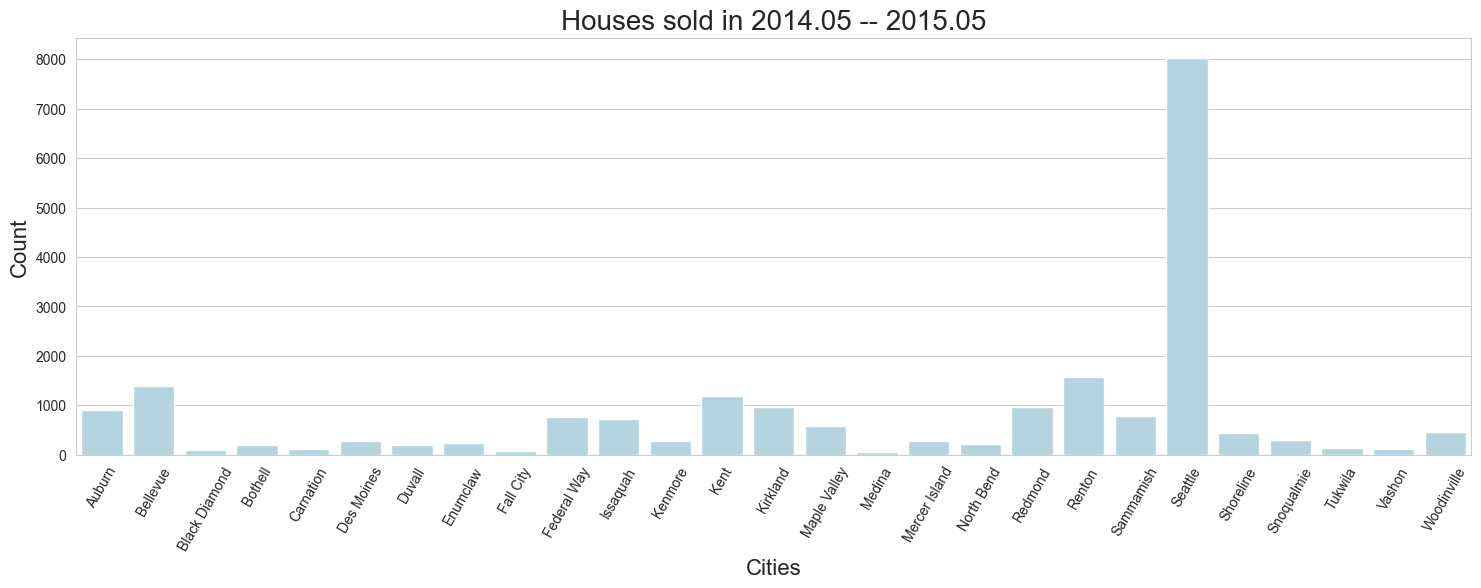

In [252]:
#plot houses sold in all cities
df_house_info_count = df_house_info.groupby('area')['house_id'].count().reset_index()
df_house_info_count.columns
plt.figure(figsize=(18, 3))
sns.set_style('whitegrid')
ax = sns.barplot(x='area',y='house_id',data=df_house_info_count, color='lightblue')

plt.title('Houses sold in 2014.05 -- 2015.05', fontsize=20)
plt.xlabel('Cities', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=60)

plt.subplots_adjust(top=1.5)
plt.show()

In [253]:


# 对指定列进行描述性统计
df_statistics = df_house_info[['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'condition', 'grade', 'yr_built']].describe()


df_statistics['yr_built']=df_statistics['yr_built'].astype(int)

df_statistics

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade,yr_built
count,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420.000,21420
mean,540739.304,3.374,2.118,2083.133,15128.038,3.411,7.663,1971
std,367931.110,0.925,0.769,918.808,41530.797,0.650,1.172,29
min,78000.000,1.000,0.500,370.000,520.000,1.000,3.000,1900
25%,322500.000,3.000,1.750,1430.000,5040.000,3.000,7.000,1952
50%,450000.000,3.000,2.250,1920.000,7614.000,3.000,7.000,1975
75%,645000.000,4.000,2.500,2550.000,10690.500,4.000,8.000,1997
max,7700000.000,33.000,8.000,13540.000,1651359.000,5.000,13.000,2015


In [254]:
#step 2 Calculate average price
df_avg_price = pd.DataFrame()
df_avg_price['house_id'] = df_house_info['house_id']
df_avg_price['zipcode'] = df_house_info['zipcode']

df_avg_price['price/sqft_living'] = df_house_info['price'] / df_house_info['sqft_living']

df_avg_price['price/sqft_lot'] = df_house_info['price'] / df_house_info['sqft_lot']
df_avg_price['lat'] = df_house_info['lat']
df_avg_price['long'] = df_house_info['long']
df_avg_price['area'] = df_house_info['area']
df_avg_price['price'] = df_house_info['price']
df_avg_price.drop_duplicates(subset=['house_id'])
df_count_by_city = df_avg_price.groupby('area')['house_id'].count().reset_index()
df_avg_price.rename(columns={'house_id':'count'},inplace=True)



<Figure size 1800x300 with 0 Axes>

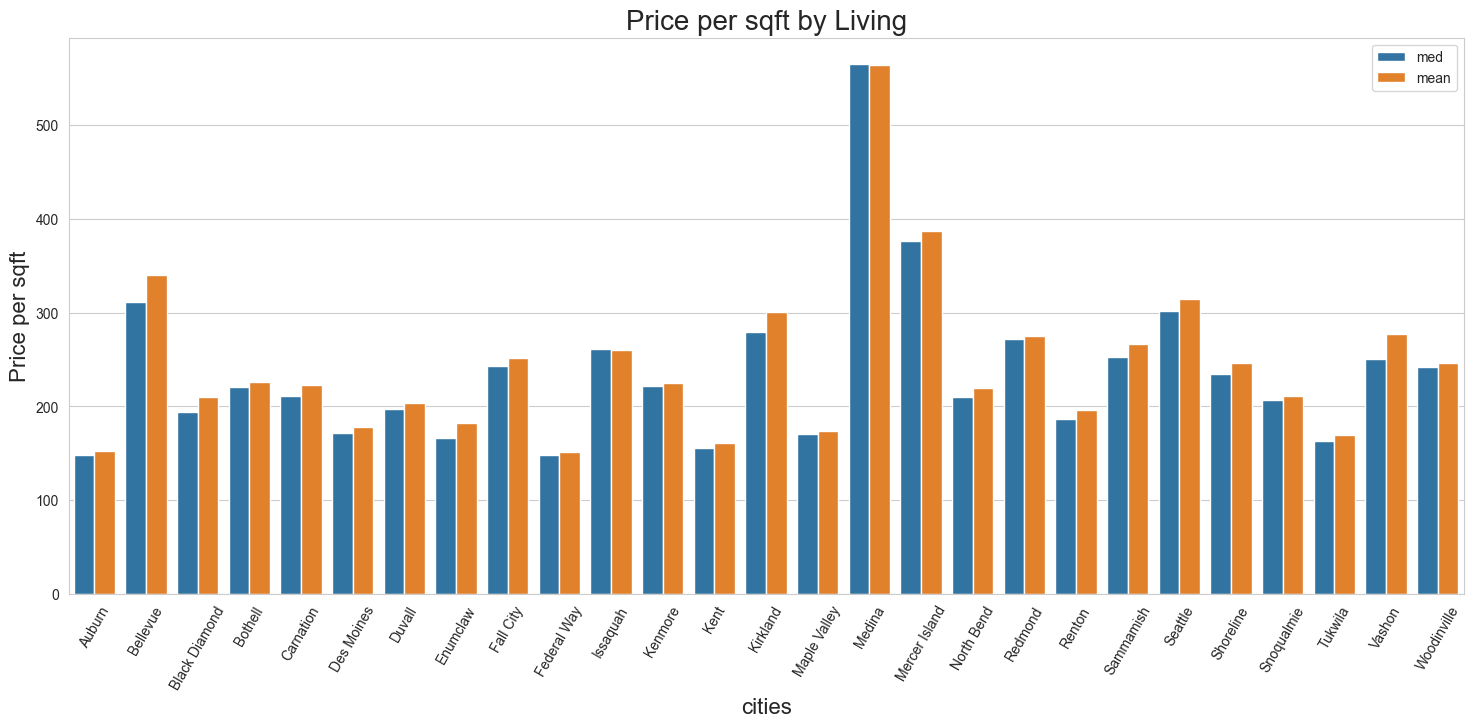

In [255]:
#Statistic of Price per sqft by living 
plt.figure(figsize=(18, 3))
sns.set_style('whitegrid')
df_avg_price_median = df_avg_price.groupby('area')[['price/sqft_living']].median().reset_index()
df_avg_price_median['type'] = "med"
df_avg_price_mean = df_avg_price.groupby('area')[['price/sqft_living']].mean().reset_index()
df_avg_price_mean['type'] = "mean"
#df_avg_price_max = df_avg_price.groupby('area')[['price/sqft_living']].max().reset_index()
#df_avg_price_max['type'] = "max"
#df_avg_price_min = df_avg_price.groupby('area')[['price/sqft_living']].min().reset_index()
#df_avg_price_min['type'] = "min"
df_merged = pd.concat([df_avg_price_median, df_avg_price_mean])
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
ax = sns.barplot(x='area', y='price/sqft_living', data=df_merged, hue='type')

plt.title('Price per sqft by Living', fontsize=20)
plt.xlabel('cities', fontsize=16)
plt.ylabel('Price per sqft', fontsize=16)
plt.xticks(rotation=60)
plt.legend()
plt.subplots_adjust(top=1.5)
plt.show()


In [256]:
df_avg_price.head()

,count,zipcode,price/sqft_living,price/sqft_lot,lat,long,area,price
0,1000102,98002,116.667,29.873,47.326,-122.214,Auburn,280000.000
1,100100050,98155,208.333,24.797,47.775,-122.304,Shoreline,275000.000
2,1001200035,98188,201.815,34.172,47.432,-122.292,Tukwila,272450.000
3,1001200050,98188,205.556,35.734,47.433,-122.292,Tukwila,259000.000
4,1003000175,98188,225.510,29.056,47.436,-122.290,Tukwila,221000.000


In [257]:
df = df_avg_price

In [258]:
df.head()

,count,zipcode,price/sqft_living,price/sqft_lot,lat,long,area,price
0,1000102,98002,116.667,29.873,47.326,-122.214,Auburn,280000.000
1,100100050,98155,208.333,24.797,47.775,-122.304,Shoreline,275000.000
2,1001200035,98188,201.815,34.172,47.432,-122.292,Tukwila,272450.000
3,1001200050,98188,205.556,35.734,47.433,-122.292,Tukwila,259000.000
4,1003000175,98188,225.510,29.056,47.436,-122.290,Tukwila,221000.000


In [259]:
#Geographical location map
import numpy as np
import pandas as pd
import plotly.express as px

# Assuming df is your DataFrame containing the dataset
# If not, replace df with your DataFrame name

# Convert latitude and longitude to radians
df['lat_rad'] = np.radians(df['lat'])
df['long_rad'] = np.radians(df['long'])

# Define grid size
grid_size = 0.0001  # Adjust according to your preference

# Assign each point to a grid cell
df['lat_bin'] = (df['lat_rad'] / grid_size).astype(int)
df['long_bin'] = (df['long_rad'] / grid_size).astype(int)

# Calculate centroids of grid cells
centroids = df.groupby(['lat_bin', 'long_bin']).agg({'lat_rad': 'mean', 'long_rad': 'mean', 'price/sqft_living': 'mean'}).reset_index()

# Convert centroids back to degrees
centroids['lat'] = np.degrees(centroids['lat_rad'])
centroids['long'] = np.degrees(centroids['long_rad'])

# Create the plot
fig = px.scatter_mapbox(centroids, lat='lat', lon='long', color='price/sqft_living', size='price/sqft_living',
                        color_continuous_scale='Viridis', size_max=10,
                        mapbox_style='carto-positron', zoom=9)

# Update layout
fig.update_layout(title='Geolocation Plot by Average Price per Living (Clustered)',
                  mapbox=dict(center=dict(lat=47.6, lon=-122.3)),
                  margin=dict(r=0, l=0, t=0, b=0))

# Show the plot
fig.show()





In [260]:
df_house_info.groupby('area')['zipcode'].nunique().sort_values()


area
Fall City         1
Medina            1
Maple Valley      1
Vashon            1
Kenmore           1
Shoreline         1
Snoqualmie        1
Mercer Island     1
North Bend        1
Duvall            1
Des Moines        1
Carnation         1
Bothell           1
Black Diamond     1
Tukwila           1
Enumclaw          1
Sammamish         2
Kirkland          2
Woodinville       2
Issaquah          2
Federal Way       2
Redmond           2
Auburn            3
Renton            4
Kent              4
Bellevue          5
Seattle          26
Name: zipcode, dtype: int64

### General Summary for Seattle
1,in the city centre house price is more expensive 
2,the ratio of living space to floor space is higher.


In [261]:
df_house_info.head()
df_house_Seattle  = df_house_info[df_house_info['area'] == "Seattle"]
df_house_Seattle 
df_house_Seattle['price/sqft'] = df_house_Seattle['price']/df_house_Seattle['sqft_living']
df_house_Seattle['sqft_living15/sqft_lot15']=df_house_Seattle['sqft_living15']/df_house_Seattle['sqft_lot15'].round(3)
df_house_Seattle['sqft_living/sqft_lot']=df_house_Seattle['sqft_living']/df_house_Seattle['sqft_lot'].round(3)
df_house_info.columns


Index(['house_id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'id', 'year', 'area'],
      dtype='object')

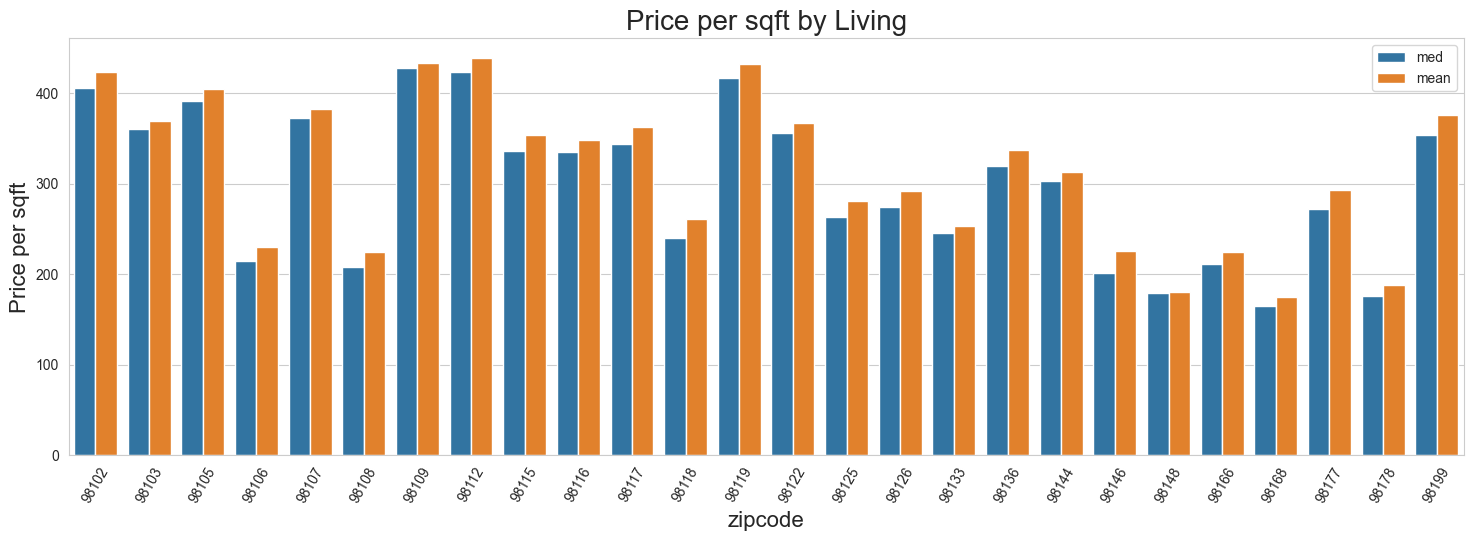

In [262]:
plt.figure(figsize=(18, 3))
sns.set_style('whitegrid')
df_house_Seattle_median = df_house_Seattle.groupby('zipcode')[['price/sqft']].median().reset_index()
df_house_Seattle_median['type'] = "med"
df_house_Seattle_mean = df_house_Seattle.groupby('zipcode')[['price/sqft']].mean().reset_index()
df_house_Seattle_mean['type'] = "mean"
#df_house_Seattle_max = df_house_Seattle.groupby('zipcode')[['price/sqft']].max().reset_index()
#df_house_Seattle_max['type'] = "max"
#df_house_Seattle_min = df_house_Seattle.groupby('zipcode')[['price/sqft']].min().reset_index()
#df_house_Seattle_min['type'] = "min"
df_merged_1 = pd.concat([df_house_Seattle_median, df_house_Seattle_mean])


ax = sns.barplot(x='zipcode', y='price/sqft', data=df_merged_1, hue='type')

plt.title('Price per sqft by Living', fontsize=20)
plt.xlabel('zipcode', fontsize=16)
plt.ylabel('Price per sqft', fontsize=16)
plt.xticks(rotation=60)
plt.legend()
plt.subplots_adjust(top=1.5)
plt.show()

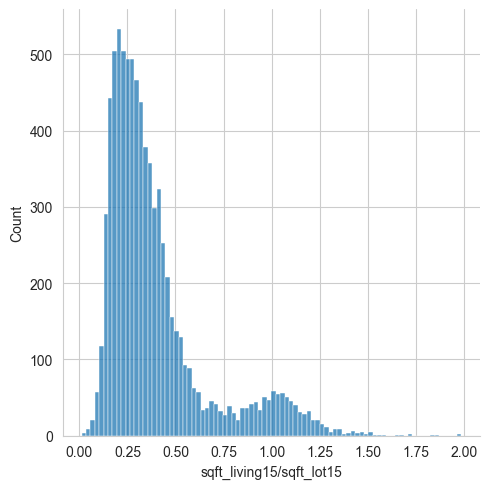

In [263]:
ax = sns.displot(x='sqft_living15/sqft_lot15', data=df_house_Seattle)

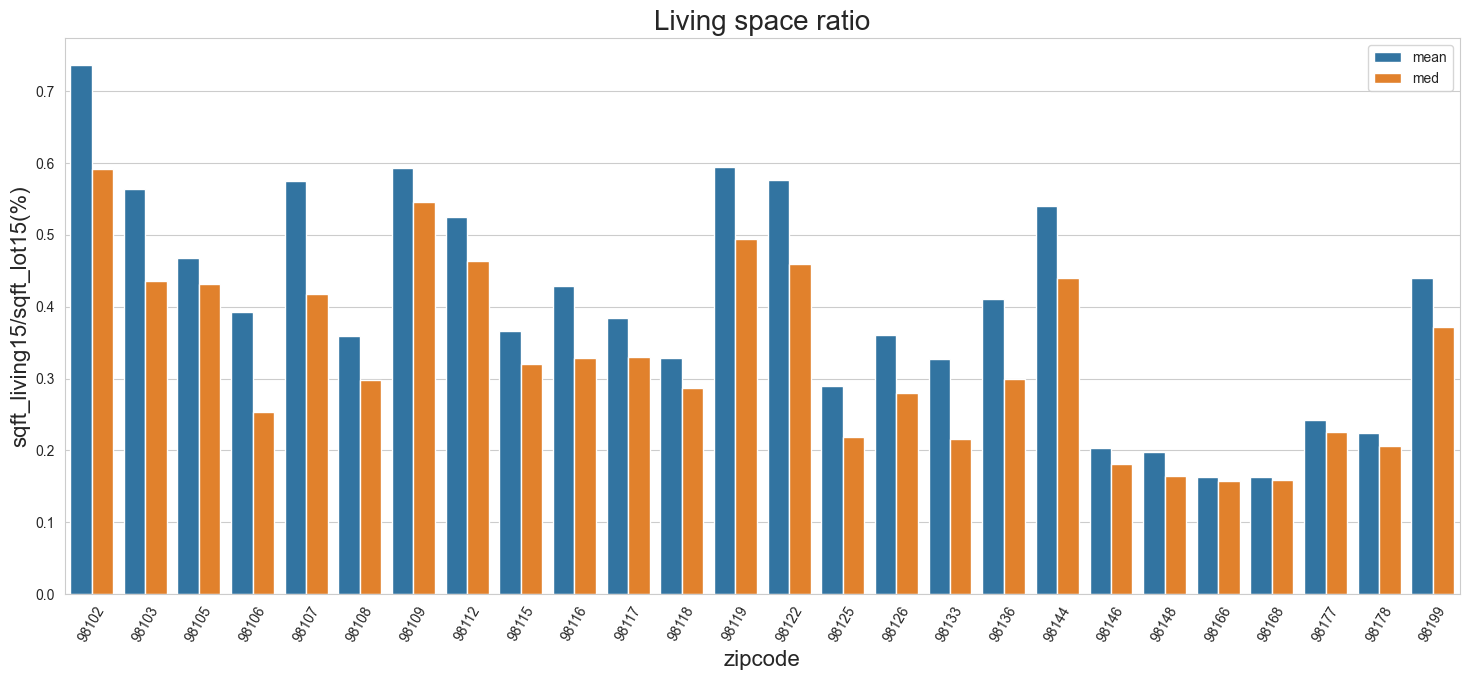

In [264]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
df_house_ls_median = df_house_Seattle.groupby('zipcode')[['sqft_living15/sqft_lot15']].median().reset_index()
df_house_ls_median['type'] = "med"
df_house_ls_mean = df_house_Seattle.groupby('zipcode')[['sqft_living15/sqft_lot15']].mean().reset_index()
df_house_ls_mean['type'] = "mean"

df_merged_3 = pd.concat([df_house_ls_mean,df_house_ls_median])


ax = sns.barplot(x='zipcode', y='sqft_living15/sqft_lot15', data=df_merged_3, hue='type')

plt.title('Living space ratio', fontsize=20)
plt.xlabel('zipcode', fontsize=16)
plt.ylabel('sqft_living15/sqft_lot15(%)', fontsize=16)
plt.xticks(rotation=60)
plt.legend()
plt.subplots_adjust(top=1.5)
plt.show()

### Analysing prices and living conditions in 5 areas

In [265]:
df_house_Seattle.columns
df_selected = df_house_Seattle[df_house_Seattle['zipcode'].isin(['98102', '98109', '98112', '98119', '98107'])]
df_selected['sqft_living'].max()
df_selected_1 = df_selected[df_selected['sqft_living'] != 12050.0]


In [266]:
import seaborn.objects as so
import matplotlib.pyplot as plt





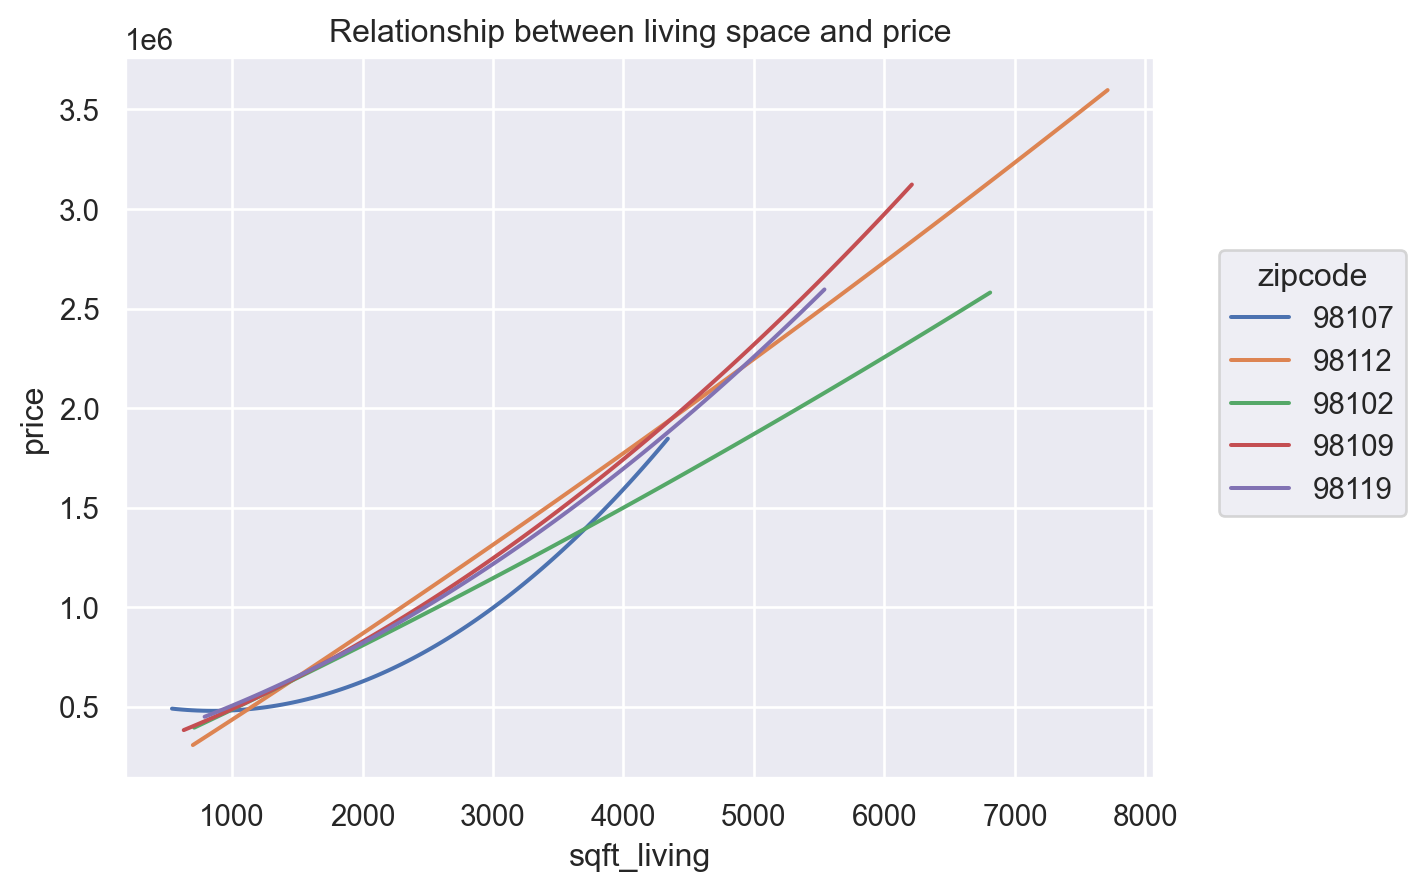

In [267]:
p2= (
    so.Plot(df_selected_1, y="price", x="sqft_living", color="zipcode")
    #.add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p2.label(title="Relationship between living space and price")


Text(40.282454861111106, 0.5, 'Price ($)')

<Figure size 1800x400 with 0 Axes>

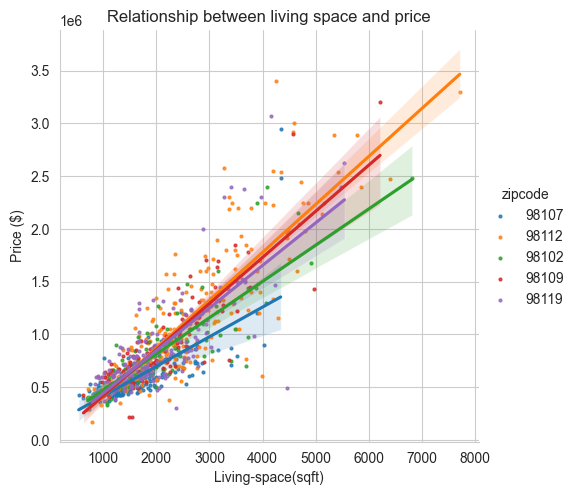

In [268]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
sns.lmplot(x="sqft_living", y="price", data=df_selected_1, hue='zipcode', scatter_kws={"s": 4});
plt.title("Relationship between living space and price")
plt.xlabel("Living-space(sqft)")
plt.ylabel("Price ($)")


The bigger, the more expensive

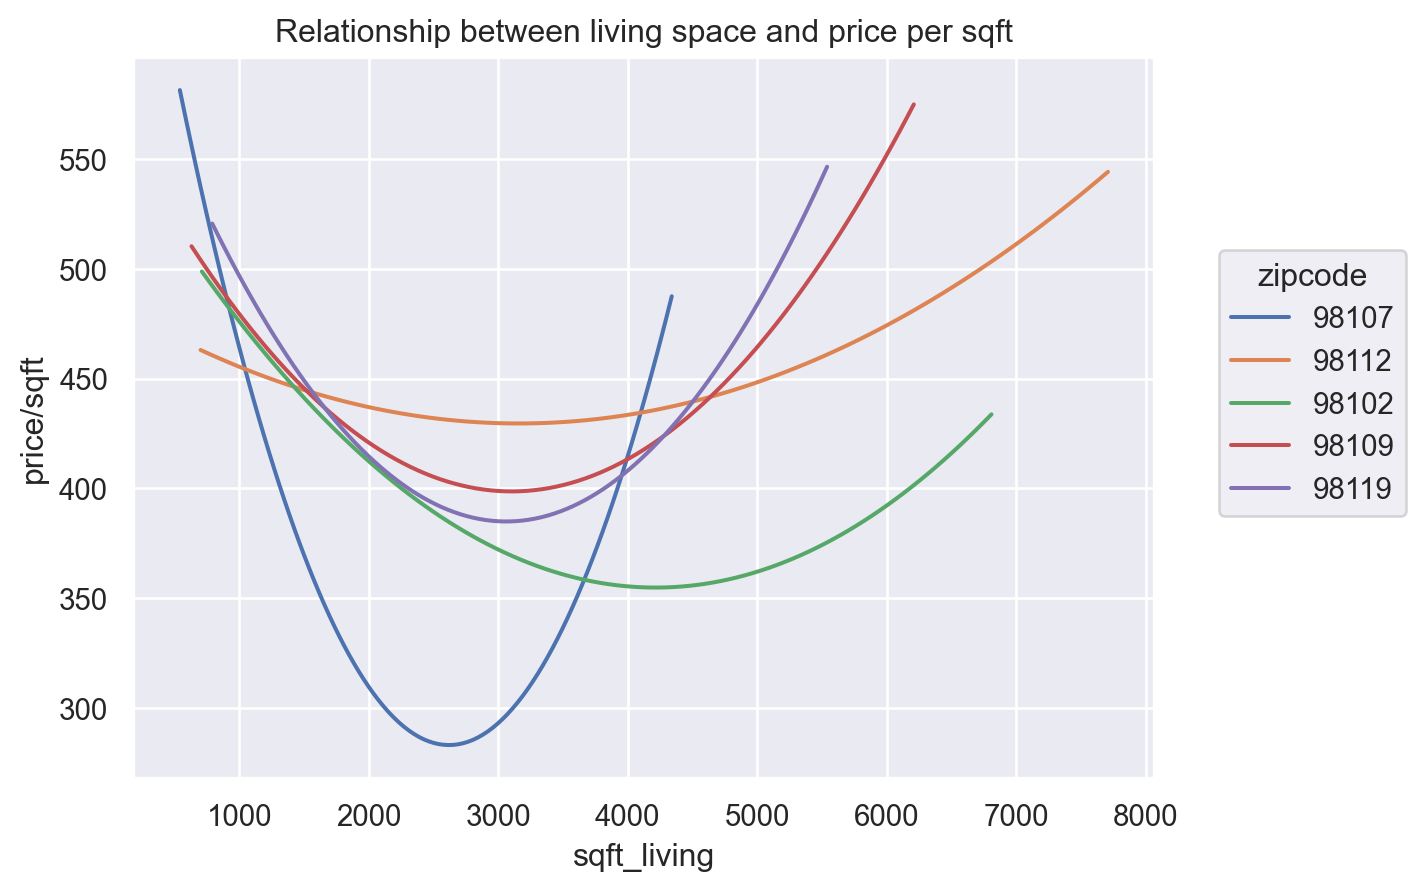

In [269]:
p= (
    so.Plot(df_selected_1, y="price/sqft", x="sqft_living", color="zipcode")
    #.add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p.label(title="Relationship between living space and price per sqft")




Text(40.969298611111114, 0.5, 'Price/sqft ($)')

<Figure size 1800x400 with 0 Axes>

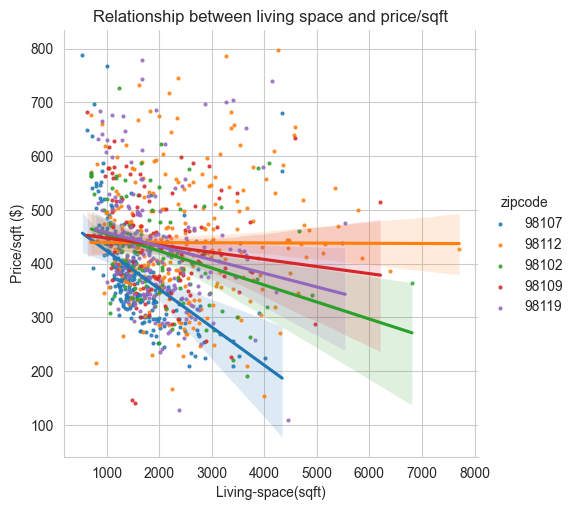

In [270]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
sns.lmplot(x="sqft_living", y="price/sqft", data=df_selected_1, hue='zipcode', scatter_kws={"s": 4});
plt.title("Relationship between living space and price/sqft")
plt.xlabel("Living-space(sqft)")
plt.ylabel("Price/sqft ($)")


Price per sqft has a lowest points(not the smallest not the biggest)
most between $300-$500 per sqft

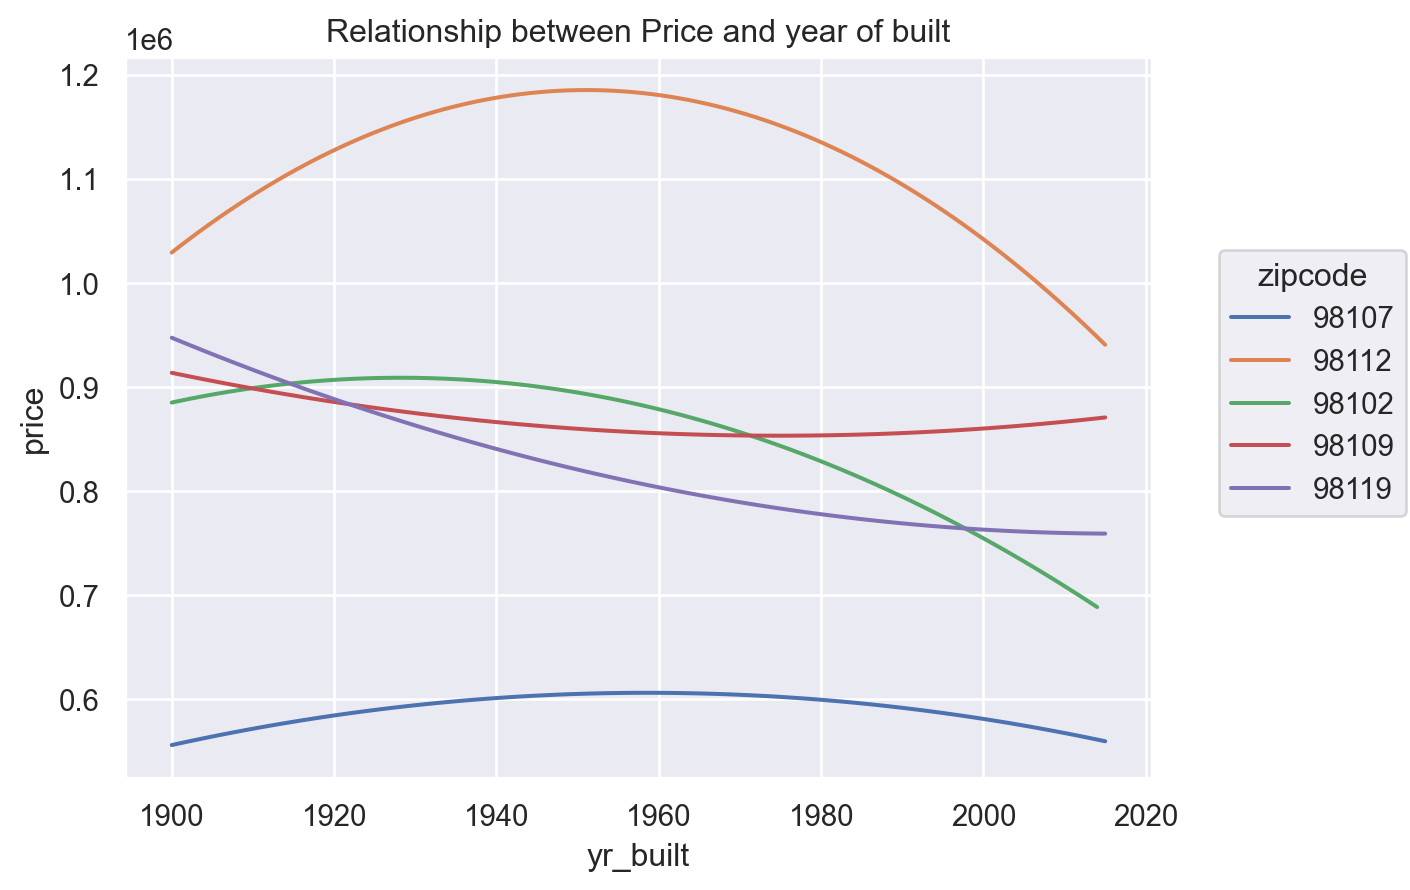

In [271]:
p1=(
    so.Plot(df_selected_1, y="price", x="yr_built", color="zipcode")
    #.add(so.Dots())
    .add(so.Line(), so.PolyFit())
)

p1.label(title="Relationship between Price and year of built")

Text(40.282454861111106, 0.5, 'Price ($)')

<Figure size 1800x400 with 0 Axes>

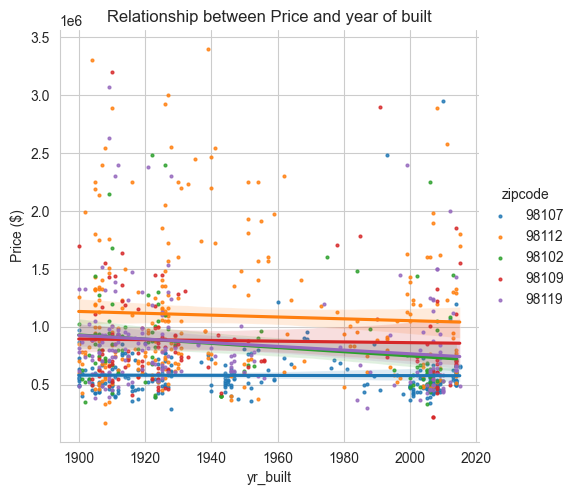

In [272]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
sns.lmplot(x="yr_built", y="price", data=df_selected_1, hue='zipcode', scatter_kws={"s": 4});
plt.title("Relationship between Price and year of built")
plt.xlabel("yr_built")
plt.ylabel("Price ($)")



Text(40.969298611111114, 0.5, 'Price/sqft($)')

<Figure size 1800x400 with 0 Axes>

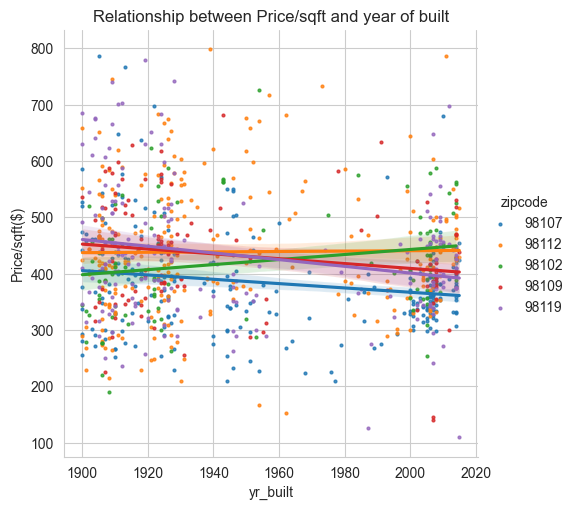

In [273]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
sns.lmplot(x="yr_built", y="price/sqft", data=df_selected_1, hue='zipcode', scatter_kws={"s": 4});
plt.title("Relationship between Price/sqft and year of built")
plt.xlabel("yr_built")
plt.ylabel("Price/sqft($)")

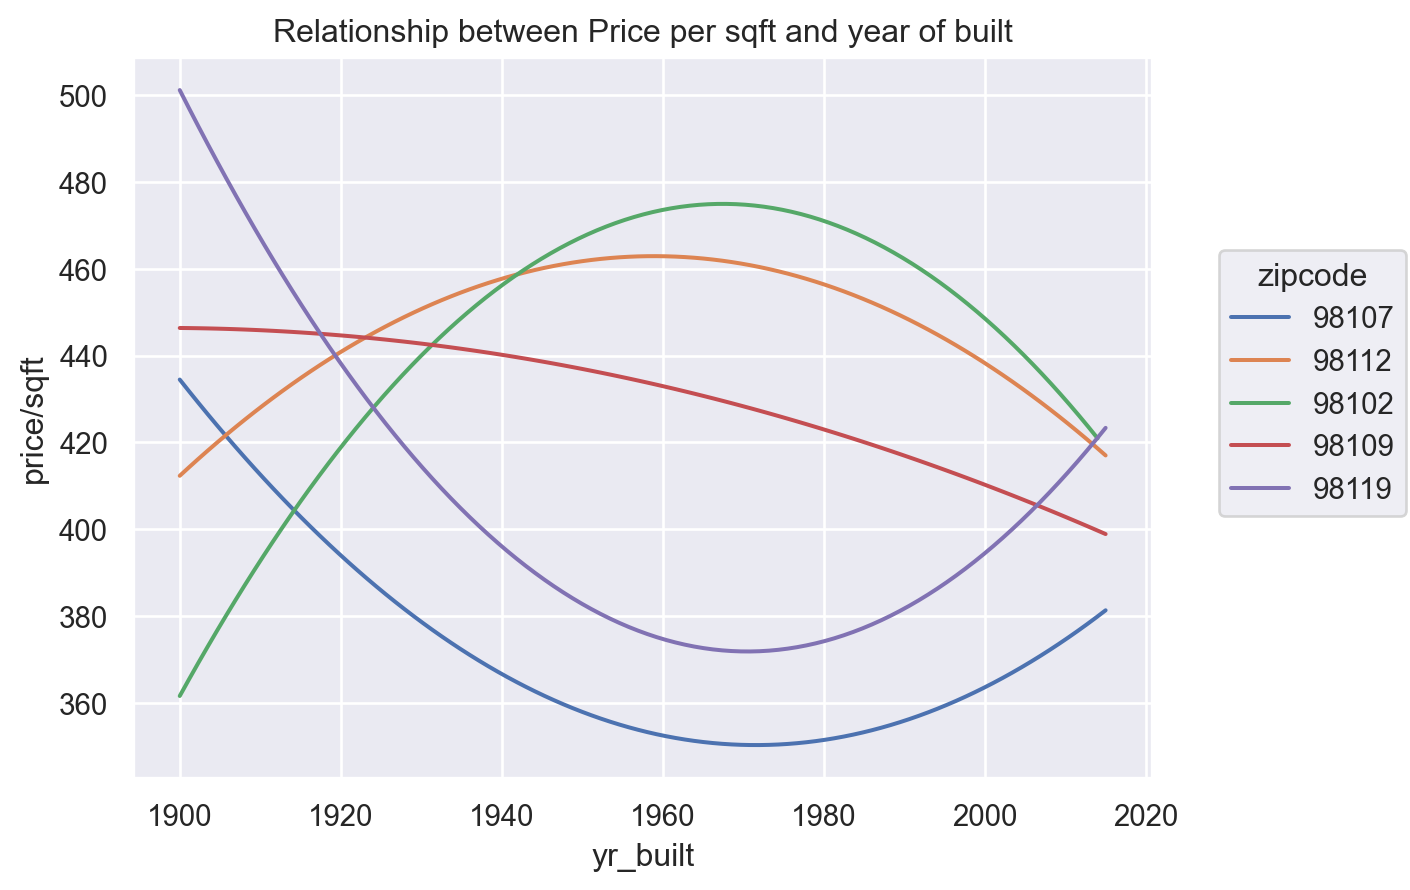

In [274]:
p3=(
    so.Plot(df_selected_1, y="price/sqft", x="yr_built", color="zipcode")
    #.add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p3.label(title="Relationship between Price per sqft and year of built")

There is no clear correlation between price(price per sqft) and year of built

(1960-1980) less houses

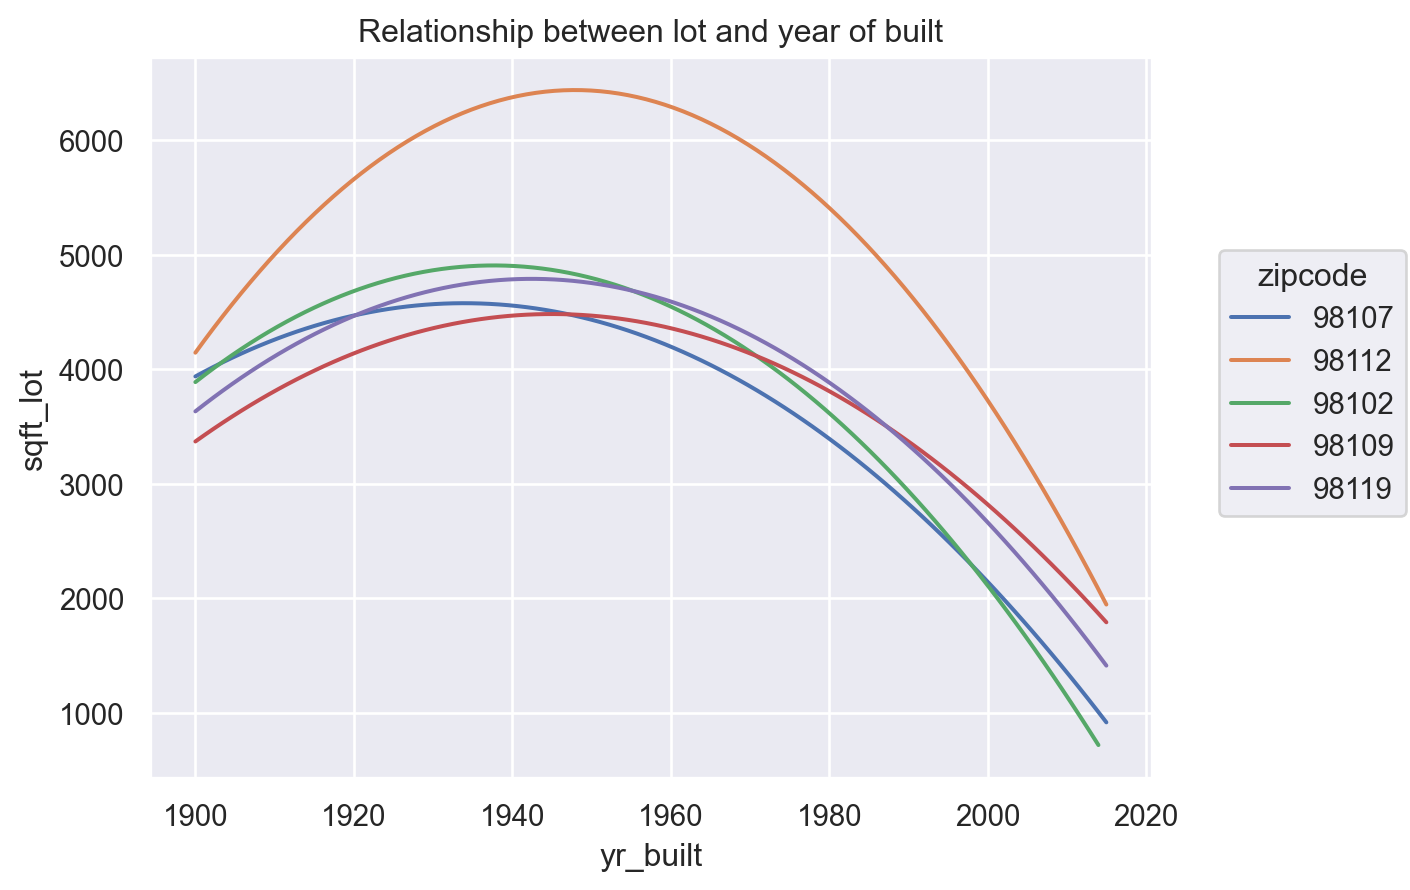

In [275]:
p4=(
    so.Plot(df_selected_1, y="sqft_lot", x="yr_built", color="zipcode")
    #.add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p4.label(title="Relationship between lot and year of built")

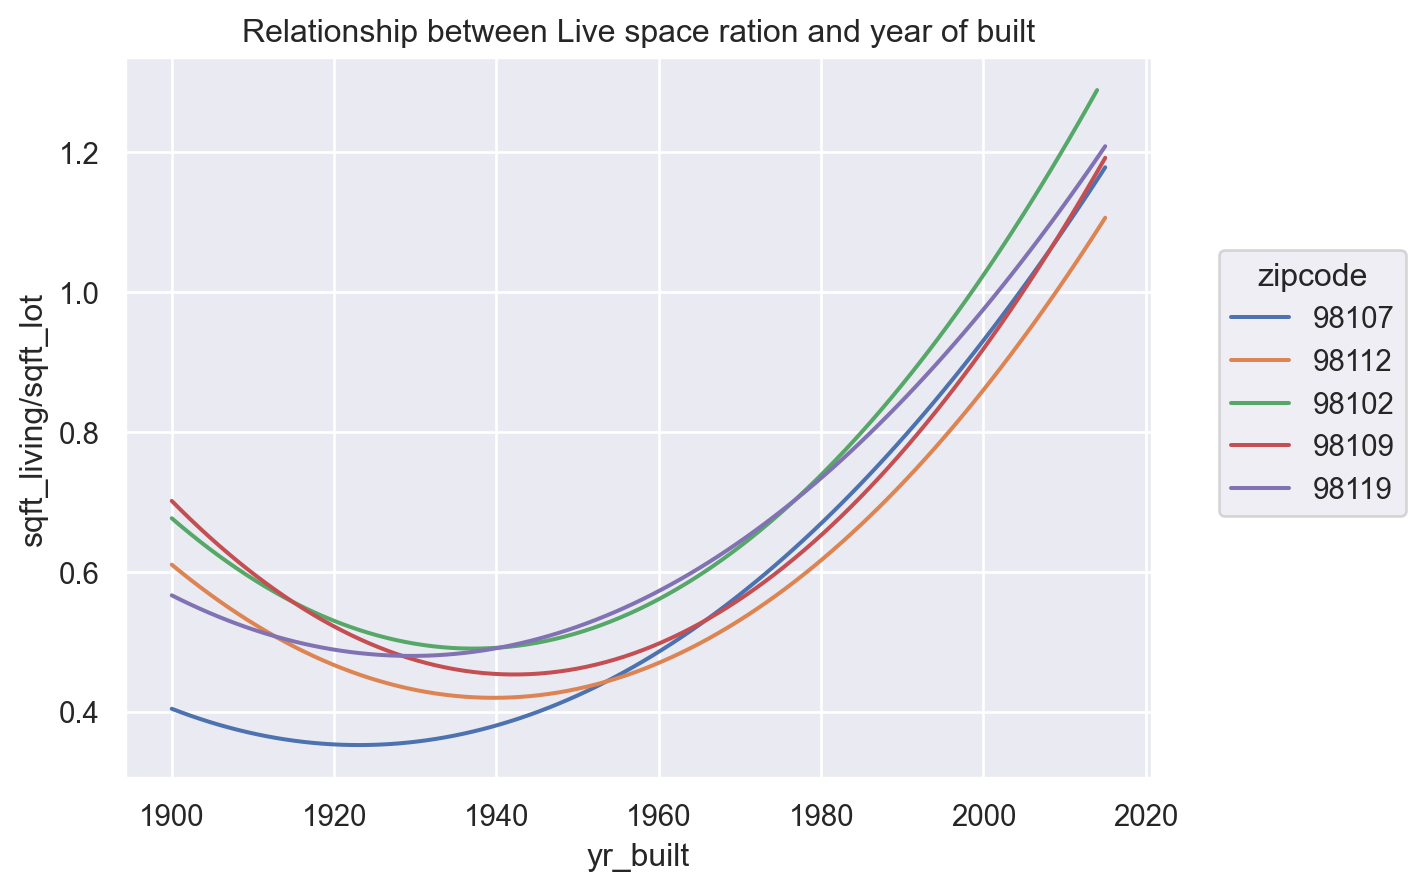

In [276]:
df_selected_2 = df_selected_1[df_selected_1['sqft_living/sqft_lot']<3]
p5=(
    so.Plot(df_selected_2, y="sqft_living/sqft_lot", x="yr_built", color="zipcode")
    #.add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p5.label(title="Relationship between Live space ration and year of built")


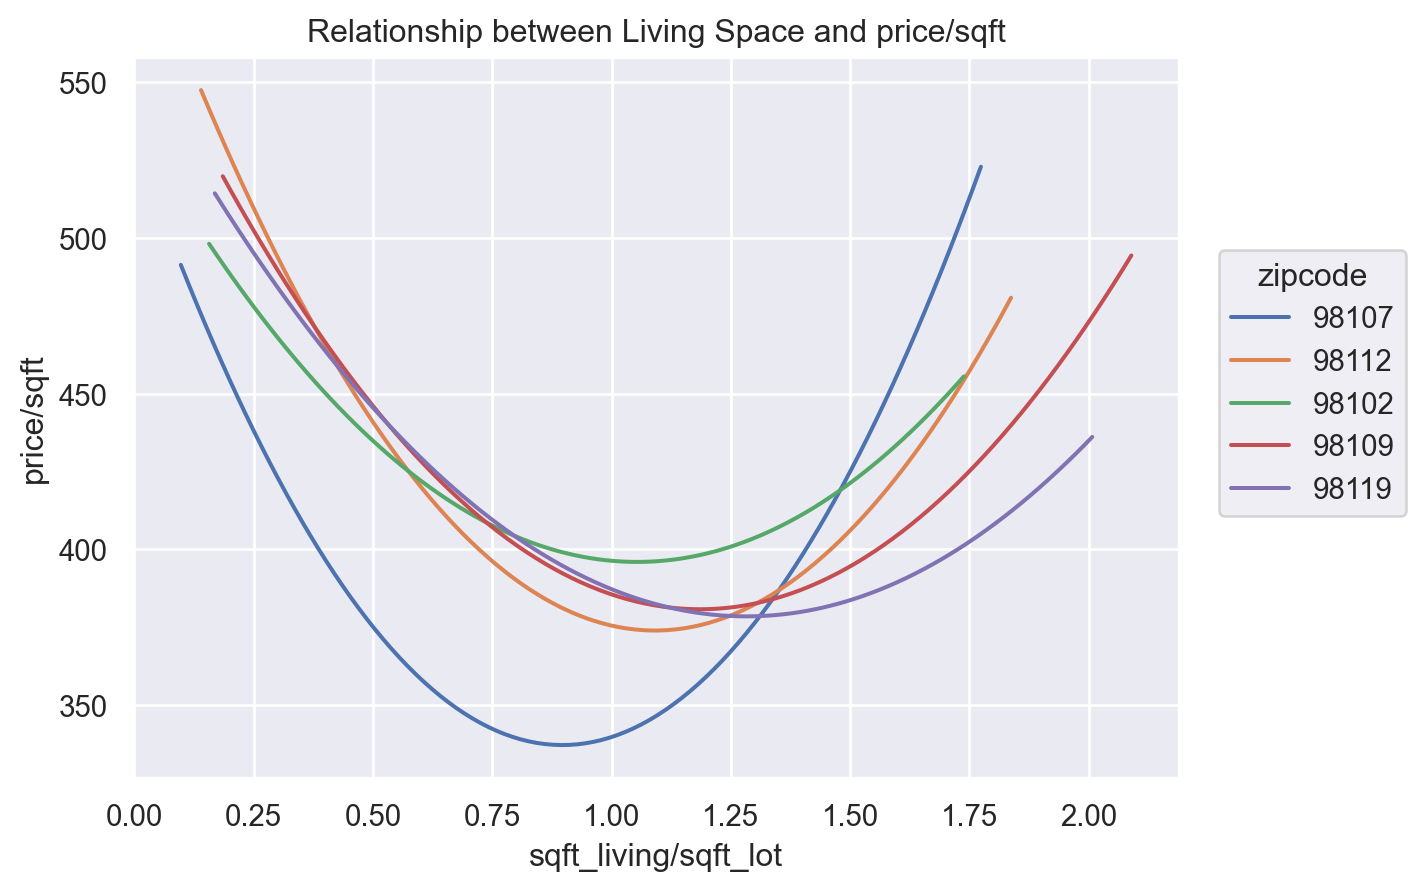

In [277]:
df_selected_2 = df_selected_1[df_selected_1['sqft_living/sqft_lot']<3]
p51=(
    so.Plot(df_selected_2, y="price/sqft", x="sqft_living/sqft_lot", color="zipcode")
    #.add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p51.label(title="Relationship between Living Space and price/sqft")

In [278]:

df_selected_1['yr_renovated'] = pd.to_datetime(df_selected_1['yr_renovated'])

# 提取年份
df_selected_1['yr_re'] = df_selected_1['yr_renovated'].dt.year
df_selected_1['yr_renovated'].describe()


count                              767
mean     1970-01-01 00:00:00.000001564
min                1970-01-01 00:00:00
25%                1970-01-01 00:00:00
50%                1970-01-01 00:00:00
75%                1970-01-01 00:00:00
max      1970-01-01 00:00:00.000020150
Name: yr_renovated, dtype: object

for new houses,the living space ration(sqft_living/sqft_lot) is higher

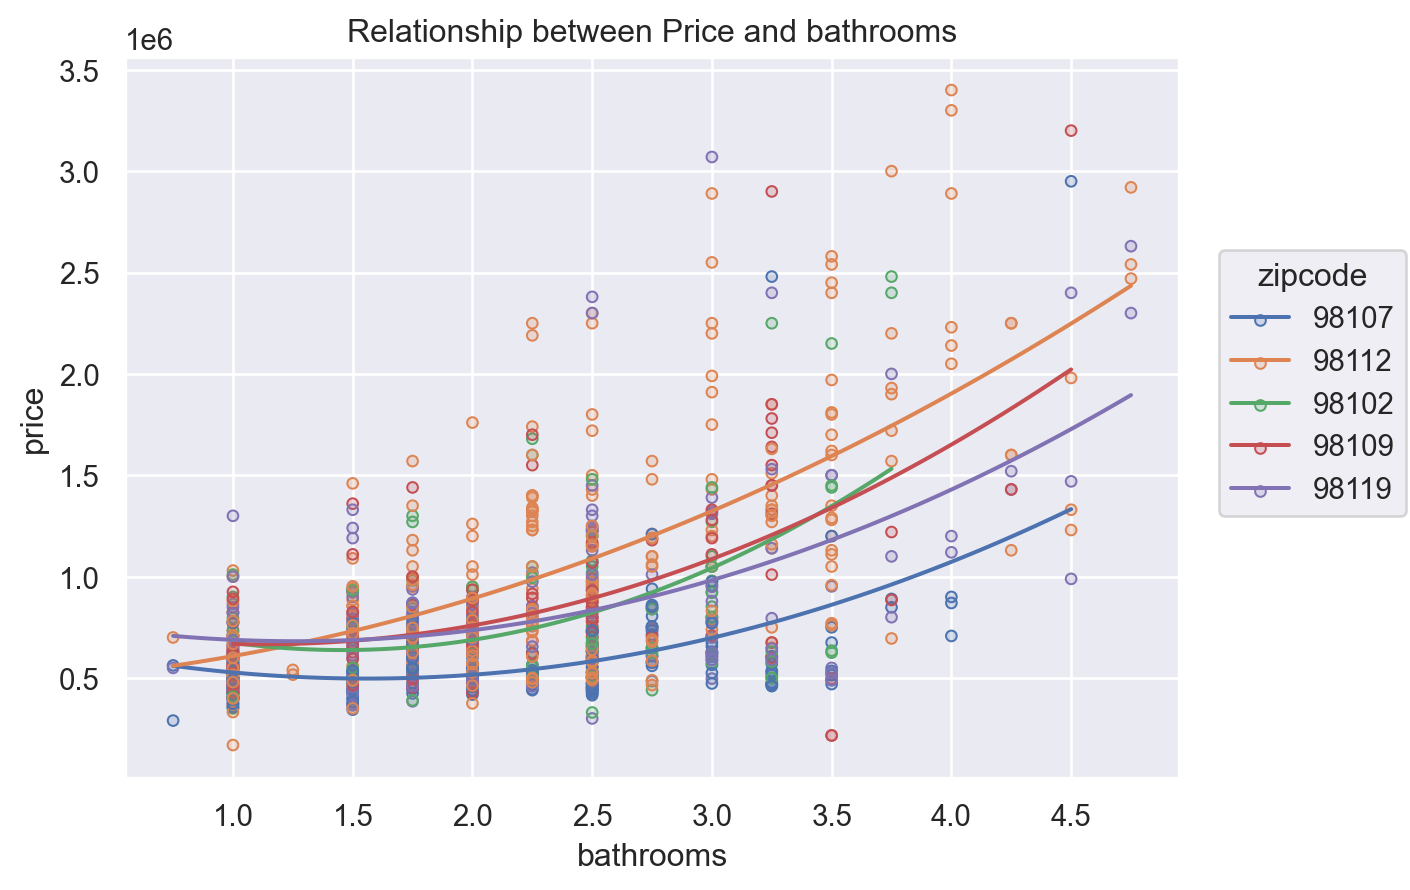

In [279]:

p6=(
    so.Plot(df_selected_1, y="price", x="bathrooms", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p6.label(title="Relationship between Price and bathrooms")

Text(40.282454861111106, 0.5, 'Price ($)')

<Figure size 1800x400 with 0 Axes>

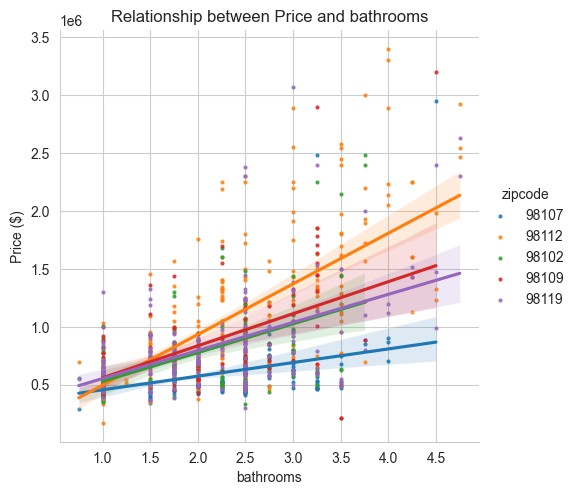

In [280]:
plt.figure(figsize=(18, 4))
sns.set_style('whitegrid')
sns.lmplot(x="bathrooms", y="price", data=df_selected_1, hue='zipcode', scatter_kws={"s": 4});
plt.title("Relationship between Price and bathrooms")
plt.xlabel("bathrooms")
plt.ylabel("Price ($)")

In [281]:
df_selected_a = df_selected_1[(df_selected_1['bedrooms'] < 7) & (df_selected_1['bedrooms'] > 1)]


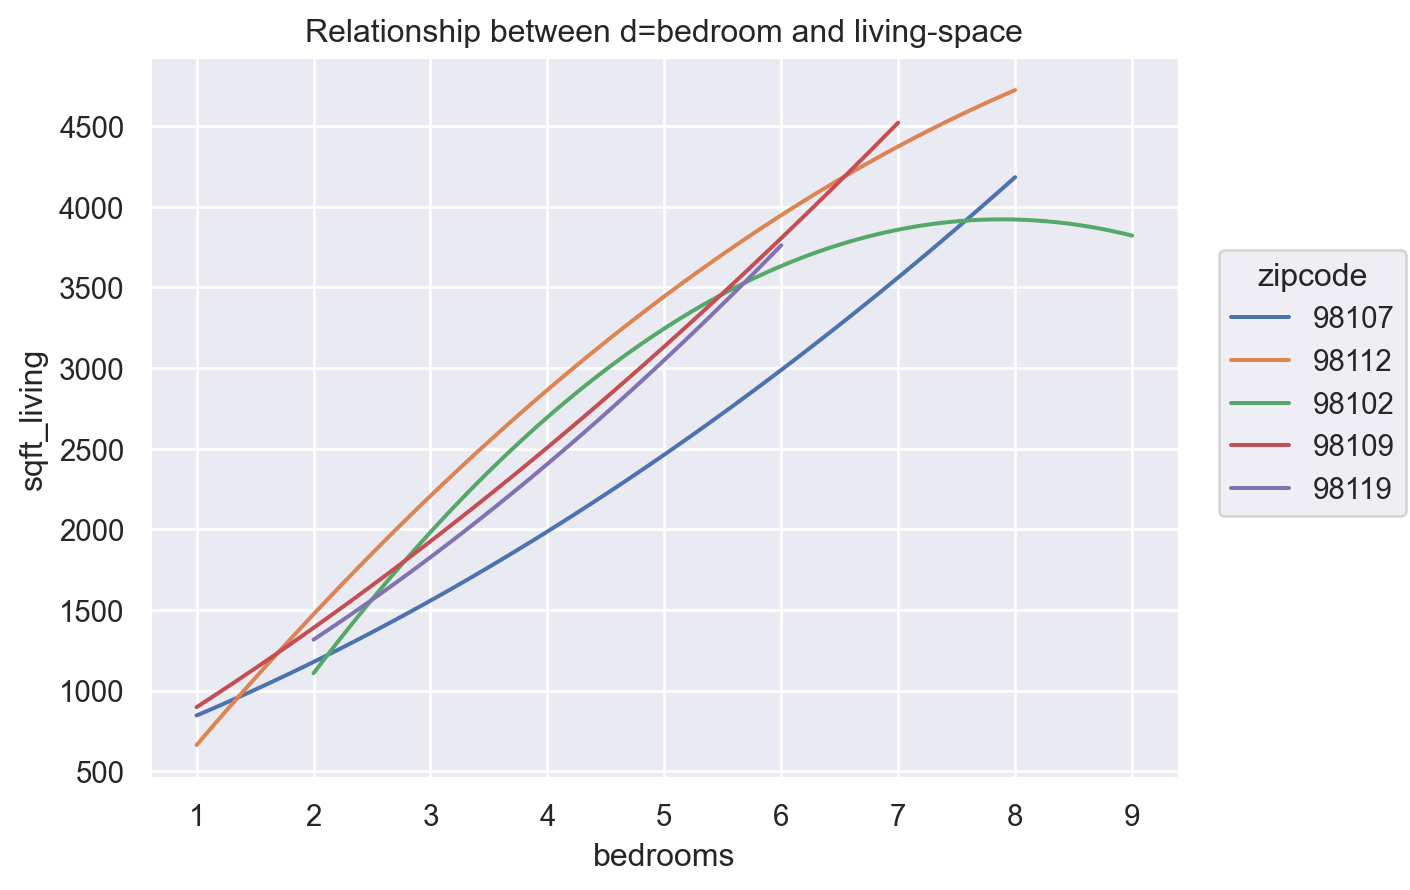

In [282]:
p10=(
    so.Plot(df_selected_1, y="sqft_living", x="bedrooms", color="zipcode")
    #.add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p10.label(title="Relationship between d=bedroom and living-space")

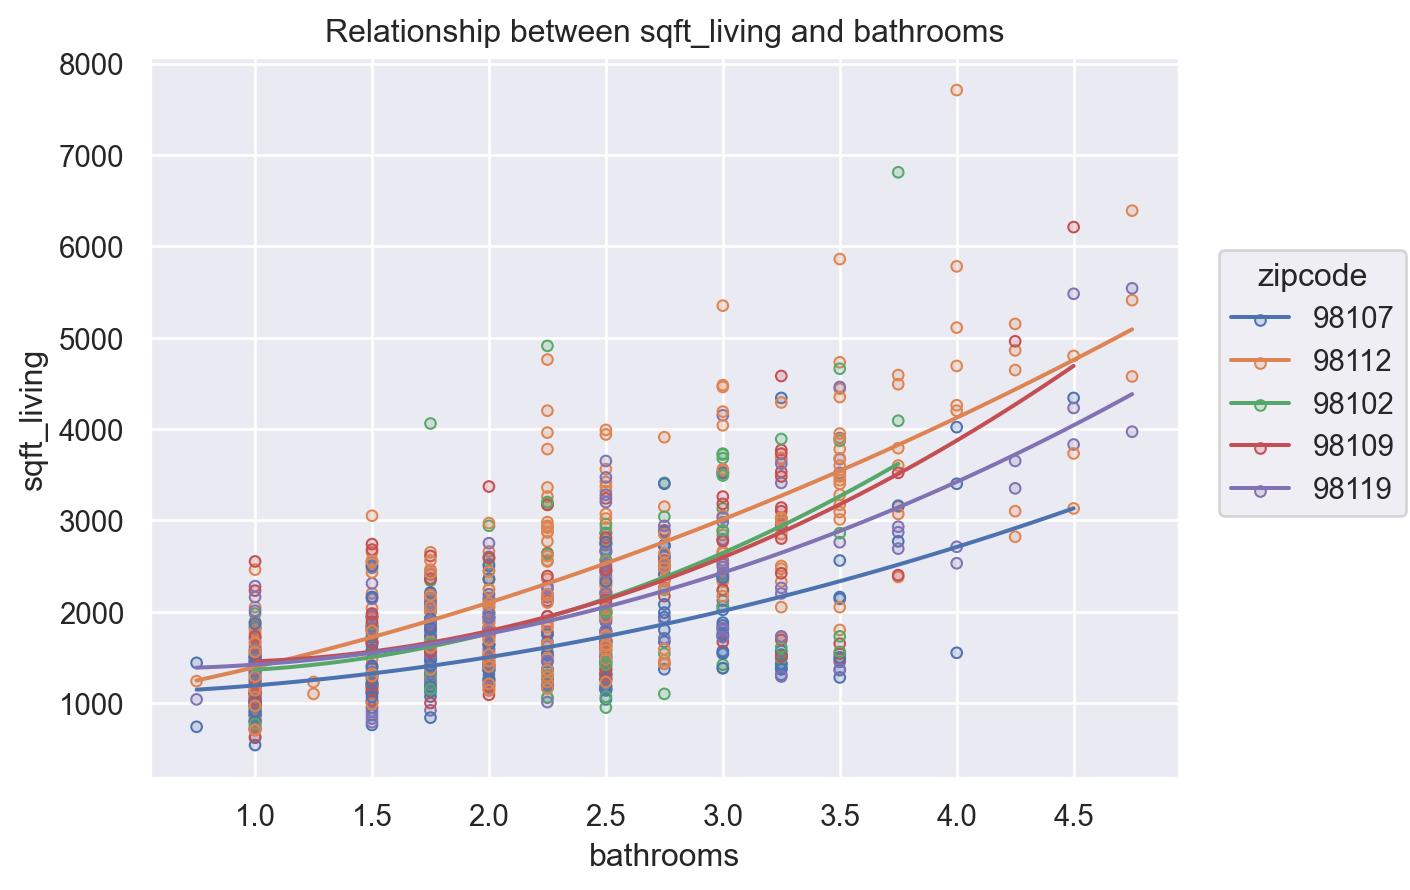

In [283]:
p101=(
    so.Plot(df_selected_1, y="sqft_living", x="bathrooms", color="zipcode")
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
)
p101.label(title="Relationship between sqft_living and bathrooms")

In [284]:
df_a = df_selected_1[['condition', 'zipcode','grade','bedrooms','bathrooms']]
df_a

,condition,zipcode,grade,bedrooms,bathrooms
78,4,98107,6,1.000,0.750
236,5,98112,8,4.000,2.250
362,3,98112,9,4.000,3.750
363,5,98112,10,4.000,3.500
364,3,98112,11,4.000,4.000
...,...,...,...,...,...
21321,3,98102,9,2.000,2.500
21322,3,98102,9,3.000,2.500
21323,3,98102,13,5.000,3.750
21324,5,98102,9,4.000,3.000


Text(0.5, 0, 'yr_built')

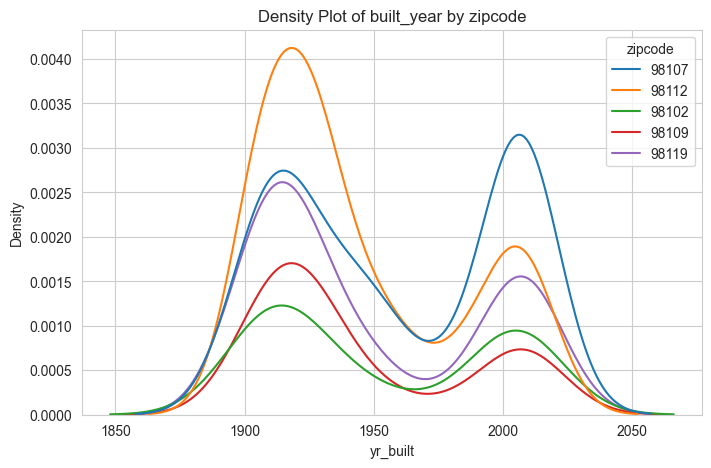

In [285]:
sns.kdeplot(data=df_selected, x="yr_built", hue='zipcode')

# 添加标题和标签
plt.title('Density Plot of built_year by zipcode')
plt.xlabel('yr_built')
#plt.ylabel('Density')
#plt.gca().axes.get_yaxis().set_visible(False)

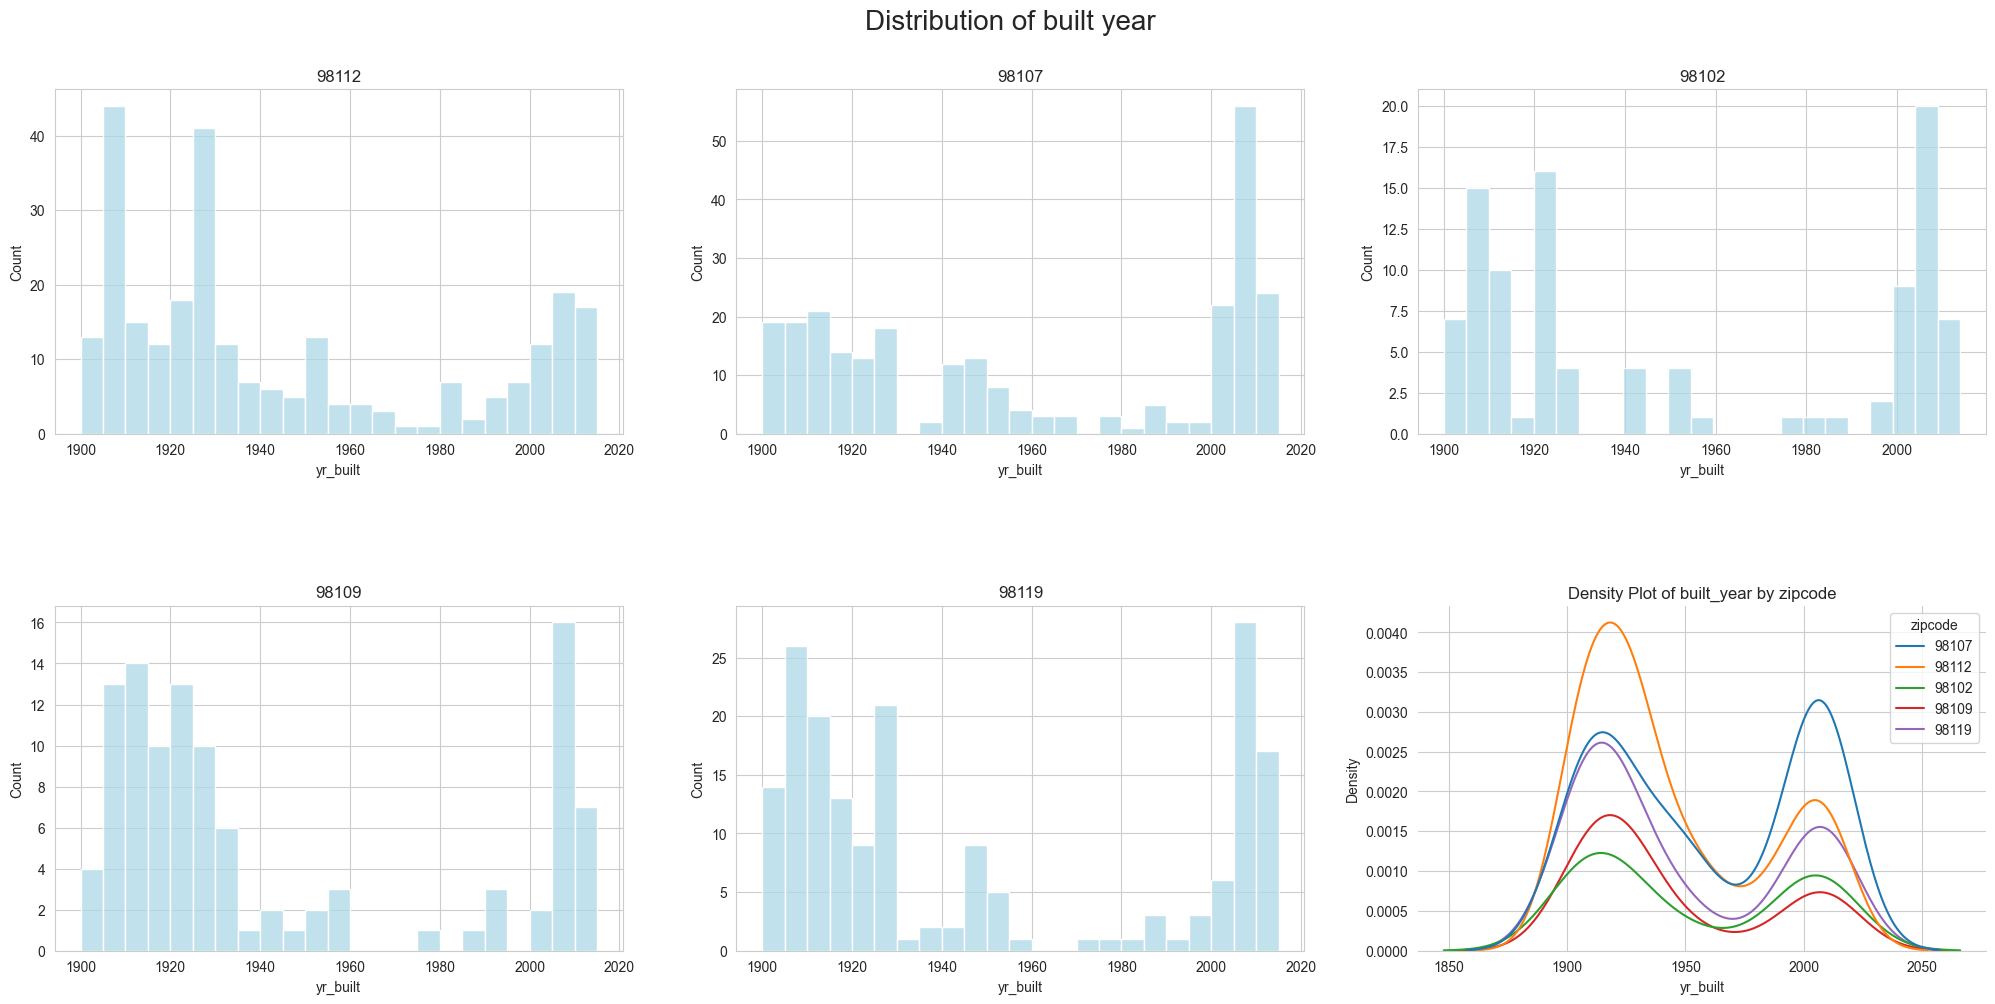

In [286]:

fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of built year', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

f1 = sns.histplot(x=df_selected_112["yr_built"],bins=23, ax=ax[0,0],color ='lightblue') # creates barchart for number of views
f1.set_title("98112")
f2 = sns.histplot(x=df_selected_107["yr_built"], bins=23, ax=ax[0,1],color = 'lightblue') # creates barchart for number of views
f2.set_title("98107")
f3 = sns.histplot(x=df_selected_102['yr_built'], bins=23, ax=ax[0,2],color = 'lightblue') # creates barchart for number of views
f3.set_title("98102")
f4 = sns.histplot(x=df_selected_109["yr_built"], bins=23, ax=ax[1,0],color = 'lightblue') # creates barchart for number of views
f4.set_title("98109")
f5 = sns.histplot(x=df_selected_119["yr_built"], bins=23, ax=ax[1,1],color = 'lightblue') # creates barchart for number of views
f5.set_title("98119")
f6 =sns.kdeplot(data=df_selected, x="yr_built", hue='zipcode',ax=ax[1,2])
f6.set_title("Density Plot of built_year by zipcode")
sns.despine(left=True, ax=ax[1,2])

# 添加标题和标签
#plt.title('Density Plot of built_year by zipcode')
#plt.xlabel('yr_built')
#plt.ylabel('Density')
#plt.gca().axes.get_yaxis().set_visible(False)
#fig.delaxes(ax[1][2]);

In [287]:
df_selected['price'].quantile(0.4)

625000.0

In [288]:
df_selected['price'].quantile(0.6)

769990.0

In [289]:
df_selected['price'].describe()

count       929.000
mean     853183.746
std      535502.712
min      169317.000
25%      535000.000
50%      690000.000
75%      952500.000
max     7700000.000
Name: price, dtype: float64

In [290]:
df_selected_price = df_selected[(df_selected['price'] < 952500.000) & (df_selected['price'] >625000.0 )]
df_selected_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 578 to 21419
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   house_id                  317 non-null    int64         
 1   bedrooms                  317 non-null    float64       
 2   bathrooms                 317 non-null    float64       
 3   sqft_living               317 non-null    float64       
 4   sqft_lot                  317 non-null    float64       
 5   floors                    317 non-null    float64       
 6   waterfront                283 non-null    float64       
 7   view                      317 non-null    float64       
 8   condition                 317 non-null    int64         
 9   grade                     317 non-null    int64         
 10  sqft_above                317 non-null    float64       
 11  sqft_basement             309 non-null    float64       
 12  yr_built               

In [291]:
df_selected_11 = df_selected[(df_selected['bathrooms']>=1)&(df_selected['bathrooms']<4)&(df_selected['bedrooms']<=6)]
#df_selected_11.info()
unique_values = df_selected_11[['bedrooms', 'condition', 'grade']].drop_duplicates()
df_selected_11['condition'].describe()
df_selected_11['grade'].describe()
df_selected_11.info(0)

<class 'pandas.core.frame.DataFrame'>
Index: 887 entries, 236 to 21419
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   house_id                  887 non-null    int64         
 1   bedrooms                  887 non-null    float64       
 2   bathrooms                 887 non-null    float64       
 3   sqft_living               887 non-null    float64       
 4   sqft_lot                  887 non-null    float64       
 5   floors                    887 non-null    float64       
 6   waterfront                789 non-null    float64       
 7   view                      886 non-null    float64       
 8   condition                 887 non-null    int64         
 9   grade                     887 non-null    int64         
 10  sqft_above                887 non-null    float64       
 11  sqft_basement             860 non-null    float64       
 12  yr_built               

### Price over time

In [292]:
#group by dedrooms as 3 tpyes：S（1-2bedrooms），M（3-4Bedrooms），L（5-6）
bins = [0,2,4,6]
labels = ['S', 'M', 'L']
df_selected_11['size']=pd.cut(df_selected_11['bedrooms'],bins=bins,labels =labels)
df_selected_11.head()

,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_lot15,date,price,id,year,area,price/sqft,sqft_living15/sqft_lot15,sqft_living/sqft_lot,size
236,1084000107,4.000,2.250,2870.000,6000.000,1.000,0.000,0.000,5,8,...,5500.000,2014-12-02,1270000.000,3127,2014,Seattle,442.509,0.431,0.478,M
362,1118000080,4.000,3.750,3600.000,16101.000,1.000,0.000,0.000,3,9,...,9506.000,2015-03-31,1930000.000,16111,2015,Seattle,536.111,0.384,0.224,M
363,1118000110,4.000,3.500,4730.000,13586.000,1.500,0.000,0.000,5,10,...,8828.000,2014-05-29,2450000.000,3732,2014,Seattle,517.970,0.420,0.348,M
366,1118000340,5.000,3.750,4590.000,11265.000,2.000,0.000,0.000,4,11,...,8996.000,2015-04-08,3000000.000,11964,2015,Seattle,653.595,0.430,0.407,L
367,1118000465,3.000,3.500,3780.000,8295.000,2.000,NaN,0.000,3,9,...,9127.000,2015-03-12,1810000.000,2319,2015,Seattle,478.836,0.414,0.456,M


In [327]:
df_price_time = df_selected_11[['house_id','date','price','size','price/sqft','zipcode']]
df_price_time['year_month'] = df_price_time['date'].dt.to_period('M')
df_price_time_count = df_price_time.groupby(['size','year_month'])['house_id'].count().reset_index()
df_price_time_count.head()


df_price_time_median = df_price_time.groupby(['size','year_month'])['price'].median().reset_index()
df_price_time_median

df_price_time_median = df_price_time_median.dropna()
df_price_time_median['year_month'] = pd.to_datetime(df_price_time_median['year_month'].astype(str))
df_price_time_median

,size,year_month,price
0,S,2014-05-01,500000.000
1,S,2014-06-01,460000.000
2,S,2014-07-01,527000.000
3,S,2014-08-01,499500.000
4,S,2014-09-01,520000.000
5,S,2014-10-01,515500.000
6,S,2014-11-01,460000.000
7,S,2014-12-01,506000.000
8,S,2015-01-01,600000.000
9,S,2015-02-01,570000.000


In [308]:
plt.figure(figsize=(2, 4))
sns.set_style('whitegrid')


<Figure size 200x400 with 0 Axes>

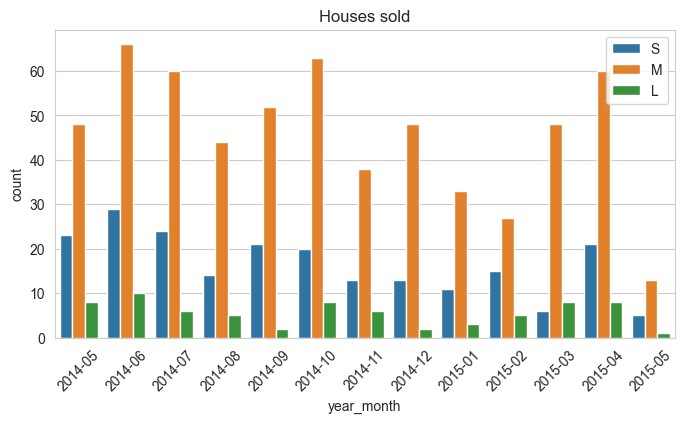

In [333]:
fig, ax = plt.subplots(figsize=(8,4)) # create subplots on 2 rows and 3 columns


f1 = sns.barplot(data=df_price_time_count,y='house_id',x='year_month',hue='size') 
f1.set_title("Houses sold")
f1.set_ylabel("count")
f1.set_xticklabels(f1.get_xticklabels(),rotation = 45)
f1.legend(loc='upper right')

#new_labels = {'small': 'Small: 1-2 bedrooms', 'medium': 'Medium: 3-4 bedrooms', 'large': 'Large: 5-6 bedrooms'}
#f1.legend(labels=new_labels, loc='upper right')

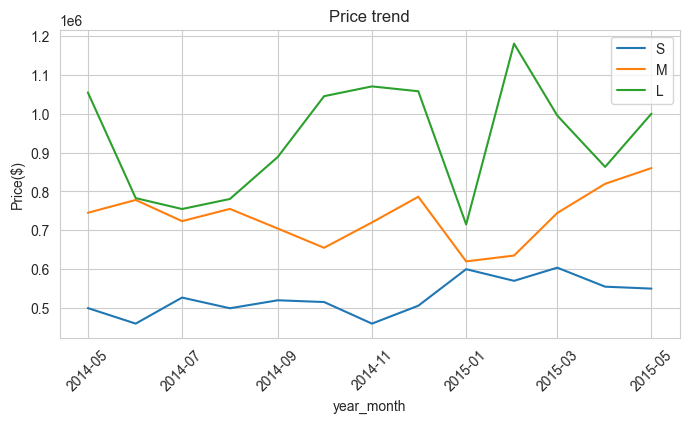

In [328]:
fig, ax = plt.subplots(figsize=(8,4)) # create subplots on 2 rows and 3 columns


f2 = sns.lineplot(data=df_price_time_median,y='price',x='year_month',hue='size') 
f2.set_title("Price trend")
f2.set_ylabel("Price($)")
f2.set_xticklabels(f2.get_xticklabels(),rotation = 45)
f2.legend(loc='upper right')